In [2]:
import healpy as hp
import matplotlib.pyplot as plt
import healsparse as hs
import fitsio
import numpy as np
import sys
import skyproj

In [3]:
from IPython.display import display, HTML #wider cells
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
print(hs.__version__)

1.6.4


In [5]:
resol_4096 = hp.nside2resol(4096, arcmin=True)
areapx_4096 = resol_4096*resol_4096
print(areapx_4096,'arcmin squared')
resol_16384 = hp.nside2resol(16384, arcmin=True)
areapx_16384 = resol_16384*resol_16384
print(areapx_16384,'arcmin squared')

0.7376604303613772 arcmin squared
0.046103776897586074 arcmin squared


In [6]:
datadir = '/afs/ciemat.es/user/s/sevilla/data/masks/'
#filename_gold_footprint = datadir+'y6a2_footprint_v2.0.hs' #nominal DES footprint from Gold
filename_gold_foregrounds_v13 = datadir+'y6a2_foreground_mask_v1.3.fits.gz' #current official Gold foreground mask
filename_gold_foregrounds_v14 = datadir+'y6a2_foreground_mask_healsparse_nside16384.fits.gz' #new version from David at higher res
#filename_sh = datadir+'y6-combined-hleda-gaiafull-des-stars-hsmap16384-nomdet-v3.fits' #shear catalog footprint

In [7]:
#footprint = hs.HealSparseMap.read(filename_gold_footprint, 32) #nominal footprint of DES 
mask_gold_v13 = hs.HealSparseMap.read(filename_gold_foregrounds_v13, 32) #note that this file contains the areas to be masked out, not a footprint
mask_gold_v14 = hs.HealSparseMap.read(filename_gold_foregrounds_v14, 32) #note that this file contains the areas to be masked out, not a footprint

In [8]:
#count the number of pixels in the mask
validpx_mask_gold_v13 = len(mask_gold_v13.valid_pixels)
validpx_mask_gold_v14 = len(mask_gold_v14.valid_pixels)

In [9]:
#calculate the area that the mask has cut out
print(areapx_4096*validpx_mask_gold_v13/3600.,'sq.deg. gold foreground mask v1.3 (low res)')
print(areapx_16384*validpx_mask_gold_v14/3600.,'sq.deg. gold foreground mask v1.4 (high res)')

654.5291734447765 sq.deg. gold foreground mask v1.3 (low res)
654.4192671632945 sq.deg. gold foreground mask v1.4 (high res)


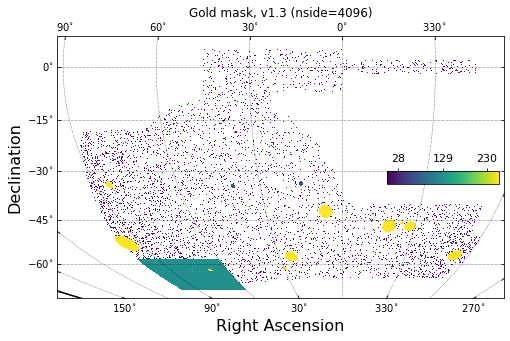

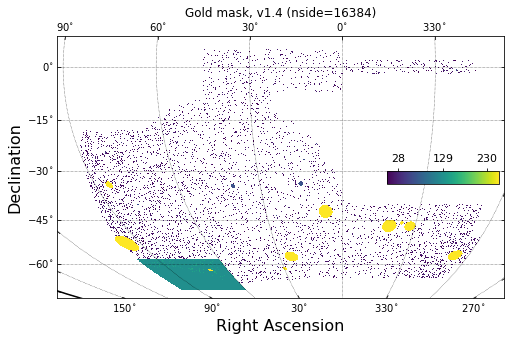

In [10]:
fig = plt.figure(1, figsize=(8, 6))
fig.clf()
ax = fig.add_subplot(111)
sp = skyproj.McBrydeSkyproj(ax=ax)
_ = sp.draw_hspmap(mask_gold_v13)
sp.draw_inset_colorbar()
plt.title('Gold mask, v1.3 (nside=4096)',y = 1.05)
plt.show()

fig = plt.figure(1, figsize=(8, 6))
fig.clf()
ax = fig.add_subplot(111)
sp = skyproj.McBrydeSkyproj(ax=ax)
_ = sp.draw_hspmap(mask_gold_v14)
sp.draw_inset_colorbar()
plt.title('Gold mask, v1.4 (nside=16384)',y = 1.05)
plt.show()

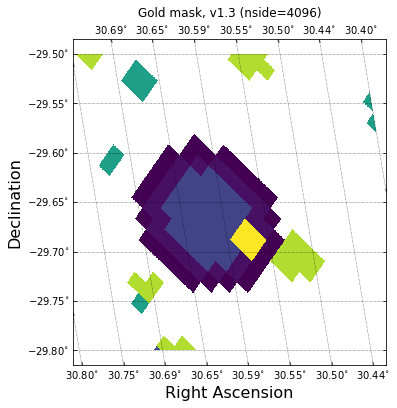

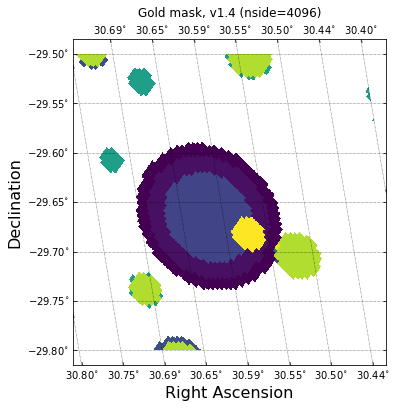

In [12]:
fig = plt.figure(1, figsize=(8, 6))
fig.clf()
ax = fig.add_subplot(111)
sp = skyproj.McBrydeSkyproj(ax=ax)
# Note that the default is to zoom in to the range defined by the map
_ = sp.draw_hspmap(mask_gold_v13,lon_range=[30.4,30.8],lat_range=[-29.8,-29.5])
#sp.draw_inset_colorbar()
plt.title('Gold mask, v1.3 (nside=4096)',y = 1.05)
plt.show()

fig = plt.figure(1, figsize=(8, 6))
fig.clf()
ax = fig.add_subplot(111)
sp = skyproj.McBrydeSkyproj(ax=ax)
# Note that the default is to zoom in to the range defined by the map
_ = sp.draw_hspmap(mask_gold_v14,lon_range=[30.4,30.8],lat_range=[-29.8,-29.5])
#sp.draw_inset_colorbar()
plt.title('Gold mask, v1.4 (nside=4096)',y = 1.05)
plt.show()

In [ ]:
#### DISREGARD CODE BELOW

In [10]:
# we create two high resolution versions of the footprint, where we will apply subsequent cuts based on the foregrounds (v1.3 and v1.4)
import copy
footprint_selv13 = copy.deepcopy(footprint)
footprint_selv13 = footprint_selv13.upgrade(16384)
footprint_selv14 = copy.deepcopy(footprint)
footprint_selv14 = footprint_selv14.upgrade(16384)

In [11]:
#let's count and store the number of pixels of each footprint, to calculate the total area
validpx_foot = len(footprint.valid_pixels)
validpx_foot_selv13 = len(footprint_selv13.valid_pixels)
validpx_foot_selv14 = len(footprint_selv14.valid_pixels)

In [12]:
print(areapx_16384*validpx_foot_selv13/3600.,'sq.deg. gold foreground masked footprint v1.3, no fracdet')
print(areapx_16384*validpx_foot_selv14/3600.,'sq.deg. gold foreground masked footprint v1.4, no fracdet')

5171.73625273524 sq.deg. gold foreground masked footprint v1.3, no fracdet
5171.73625273524 sq.deg. gold foreground masked footprint v1.4, no fracdet
